# Simple analysis 01

--> RT etc. in `simple_ana.ipynb`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = op.join(bids_folder, 'plots_and_ims', 'behavior_magjudge')

sns.set_context('talk')


In [5]:
from utils import get_data

df= get_data(bids_folder,  include_var=['group', 'age'])
df['group'] = np.where(df['group'] == 0, 'control', 'dyscalc')
df = df.sort_index()
#print(len(df.index.unique('subject')))
df['n1'] = df['n1'].astype(int)  

df['correct_answer_n2'] = np.where((df['n2'] > df['n1']), True, False)
df['correct'] = np.where((df['correct_answer_n2'] == df['chose_n2']), True, False)


number of subjects found: 66
number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


  Source  ddof1  ddof2         F     p-unc       np2
0  group      1     64  1.868834  0.176391  0.028372
  Source  ddof1  ddof2         F     p-unc       np2
0  group      1     64  3.933207  0.051636  0.057898


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


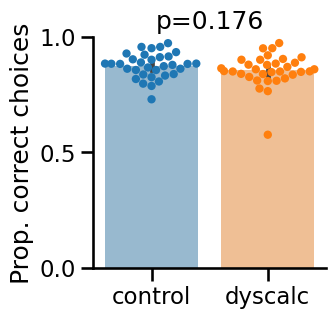

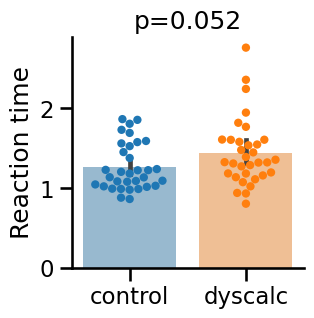

In [ ]:
import pingouin as pg

tmp = df.set_index('group', append=True)
tmp = tmp.groupby(['subject','group']).mean().reset_index()

for y_var, ylabel_name  in zip(['correct', 'rt'],['Prop. correct choices', 'Reaction time']):
    fig, ax = plt.subplots(1,1,figsize=(3,3))
    sns.barplot(ax=ax, data=tmp, x='group', hue='group', y=y_var, alpha=0.5)
    sns.swarmplot(ax=ax, data=tmp, x='group',  hue='group', y=y_var, size=6)

    an = pg.anova(data=tmp, dv=y_var, between='group')
    p_val = np.round(an['p-unc'][0],3)
    ax.set(title=f'p={p_val}',ylabel=ylabel_name,xlabel='') # ylim=(0.5,1.05),
    ax.set(ylim=[.5,1],yticks=[0,0.5,1]) if y_var == 'correct' else None
    sns.despine()
    print(an)


Reaction time - not normal distribution (reject H0)
MannwhitneyuResult(statistic=347.0, pvalue=0.011523171091226995)
MannwhitneyuResult(statistic=532.0, pvalue=0.877693639191445)


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


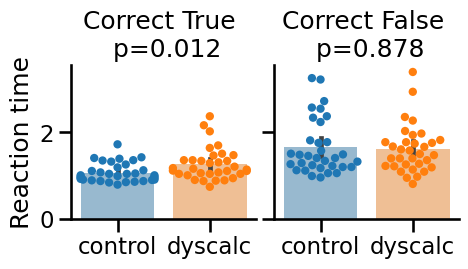

In [33]:
y_var = 'rt'
ylabel_name = 'Reaction time'

tmp = df.set_index(['group','correct'] , append=True)
tmp = tmp.groupby(['subject','group','correct'])[y_var].median().to_frame()

from scipy.stats import normaltest, mannwhitneyu, ttest_ind
_, pval_normal = normaltest(tmp[y_var])
alpha = 0.05
if pval_normal > alpha:
        print(f'{ylabel_name} - normal distribution (fail to reject H0)')
else: # non parametric test
        print(f'{ylabel_name} - not normal distribution (reject H0)')    

fig, axs = plt.subplots(1,2,figsize=(5,2),sharey=True)
for i,correct in enumerate([True, False]):
    tmp2 = tmp.xs(correct, level='correct') #[tmp['correct'] == correct]

    sns.barplot(ax=axs[i], data=tmp2, x='group', hue='group', y=y_var, alpha=0.5,)
    sns.swarmplot(ax=axs[i], data=tmp2, x='group',  hue='group', y=y_var, size=6)

    sns.despine()
    stats = mannwhitneyu(tmp2.xs('control',0,'group')[y_var], tmp2.xs('dyscalc',0,'group')[y_var], axis=0)
    axs[i].set(title=f'Correct {correct} \n p={stats.pvalue:.03f}',ylabel=ylabel_name,xlabel='') # ylim=(0.5,1.05),
    print(stats)

fig.subplots_adjust(wspace=0.1)

In [34]:
df

rt  n1    n2  choice  chose_n2      frac  \
subject run trial_nr                                                   
1       1   1         1.273829   7   2.0   False     False  0.285714   
            2         1.122310  10  28.0    True      True  2.800000   
            3         1.021185  14   5.0   False     False  0.357143   
            4         0.904514  10  28.0    True      True  2.800000   
            5         1.154789   5   1.0   False     False  0.200000   
...                        ...  ..   ...     ...       ...       ...   
66      6   176       0.787588  10  16.0    True      True  1.600000   
            177       1.004468   7   4.0   False     False  0.571429   
            178       0.687785  14  21.0    True      True  1.500000   
            179       1.188151  10   7.0   False     False  0.700000   
            180       0.971264   5   4.0   False     False  0.800000   

                      log(n2/n1)   log(n1)    group   age  correct_answer_n2  \
subject run trial_nr                                                           
1       1   1          -1.252763  1.945910  control  19.0              False   
            2           1.029619  2.302585  control  19.0               True   
            3          -1.029619  2.639057  control  19.0              False   
            4           1.029619  2.302585  control  19.0               True   
            5          -1.609438  1.609438  control  19.0              False   
...                          ...       ...      ...   ...                ...   
66      6   176         0.470004  2.302585  control  22.0               True   
            177        -0.559616  1.945910  control  22.0              False   
            178         0.405465  2.639057  control  22.0               True   
            179        -0.356675  2.302585  control  22.0              False   
            180        -0.223144  1.609438  control  22.0              False   

                      correct  
subject run trial_nr           
1       1   1            True  
            2            True  
            3            True  
            4            True  
            5            True  
...                       ...  
66      6   176          True  
            177          True  
            178          True  
            179          True  
            180          True  

[11668 rows x 12 columns]

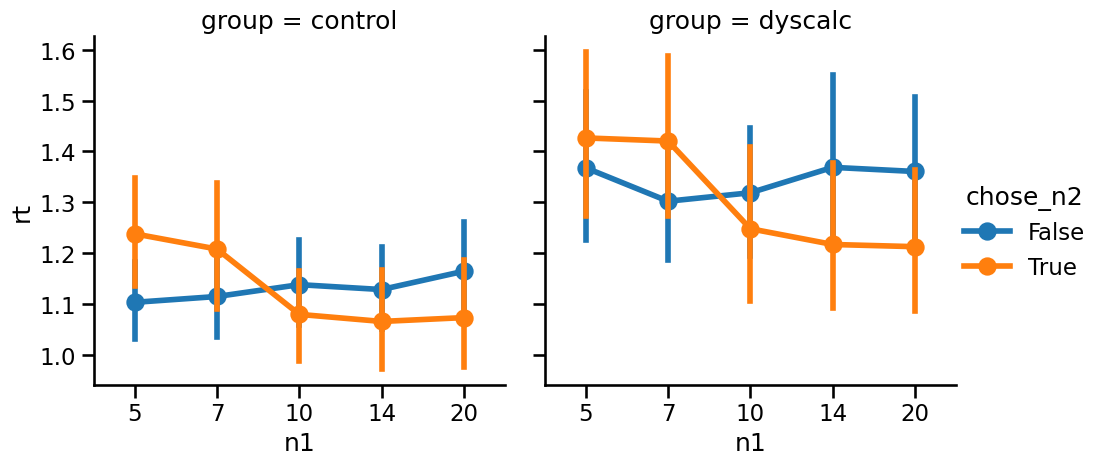

In [37]:
tmp = df.set_index(['group','chose_n2','n1'] , append=True)
tmp = tmp.groupby(['subject','group','chose_n2','n1'])['rt'].median().to_frame()

sns.catplot(tmp.reset_index(), x='n1',y='rt', hue='chose_n2',col='group', kind='point')

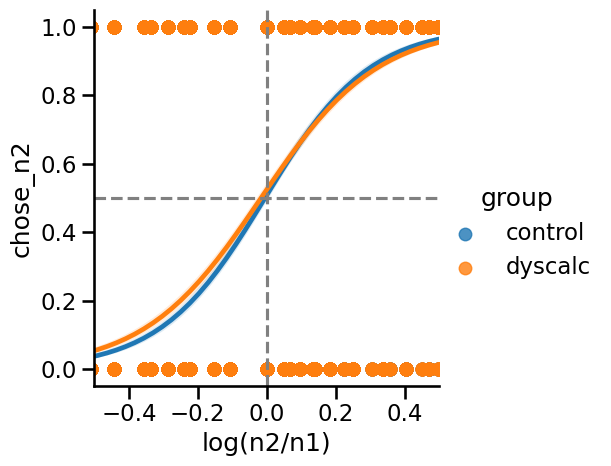

In [3]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',ci=95, logistic=True) #  col='age',

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim([-.5,.5])


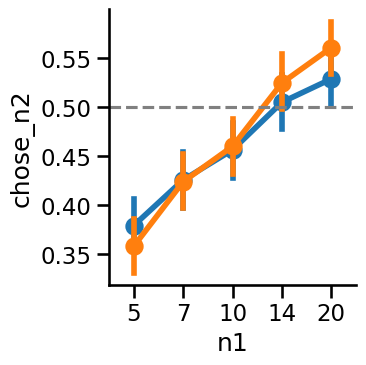

In [39]:
x_var = 'n1'

fig = sns.catplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',kind='point',height=4,errorbar='ci', legend=False) #  col='age',
plt.axhline(y=0.5,color='grey', ls='--')

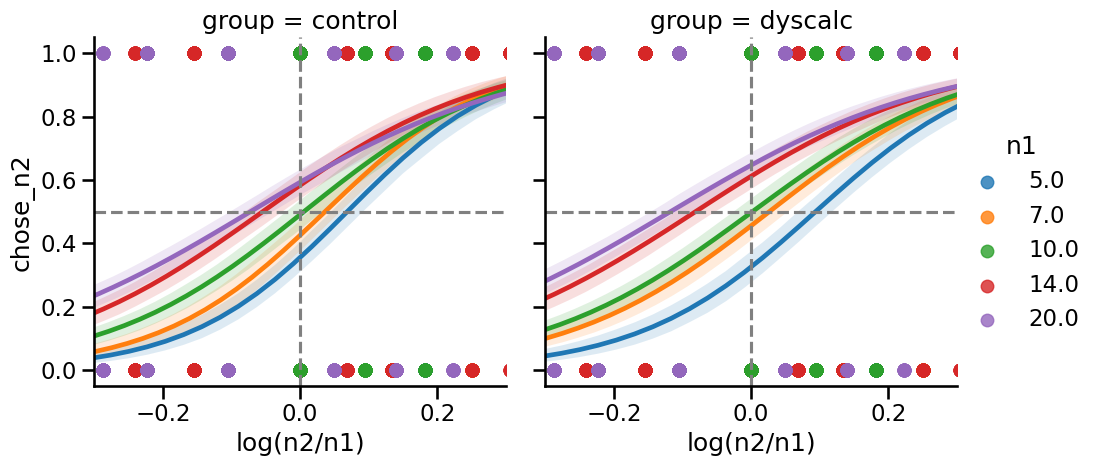

In [6]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue= 'n1', col='group',ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.3,.3)

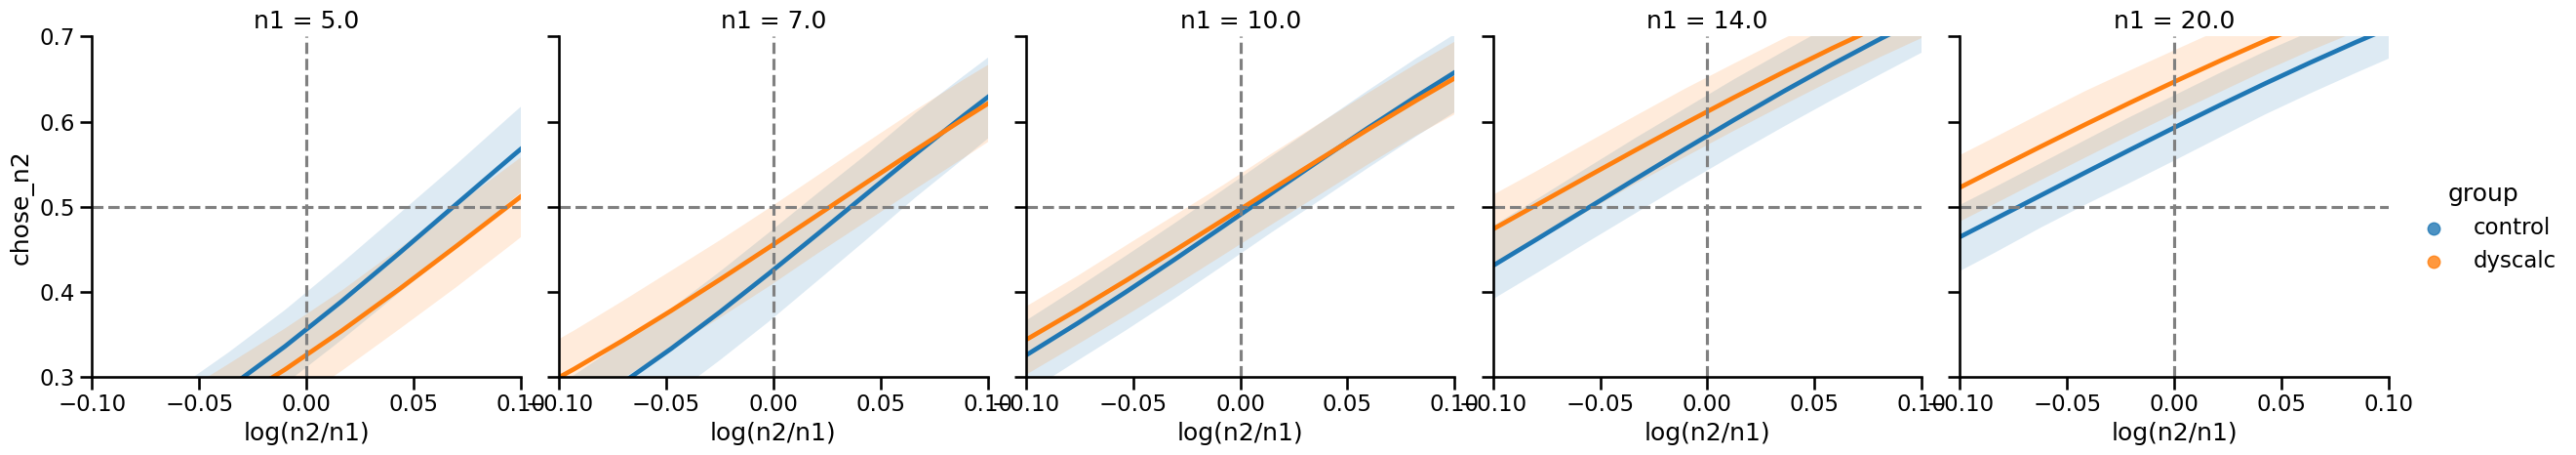

In [9]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',col = 'n1', ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.1,.1)
    ax.set_ylim(0.3,0.7)

### get subwise psychometric curves & save plots

In [18]:
# get subwise psychometric curves & save plots

# Ignore overflow RuntimeWarnings
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

x_var = 'log(n2/n1)'

for i, group in enumerate(['control','dyscalculic']):
    tmp = df[df['group']==i]
    fig = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_n2',col = 'subject', ci=95,  logistic=True, col_wrap=5) #  hue='group',

    for ax in fig.axes.flat:
        ax.axvline(x=0,color='grey', ls='--')
        ax.axhline(y=0.5,color='grey', ls='--')
        ax.set_xlim(-0.8,.8)
    fig.fig.suptitle(group, fontsize=20)
    plt.savefig(op.join(plot_folder, f'psymetCurves_{group}.pdf'))
    plt.close()

In [8]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

x_var = 'log(n2/n1)'
hue = 'n1'

for group in df['group'].unique(): 
    tmp = df[df['group']==group]
    fig = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_n2',col = 'subject', hue=hue,  ci=95,  logistic=True, col_wrap=5) #  hue='group',

    for ax in fig.axes.flat:
        ax.axvline(x=0,color='grey', ls='--')
        ax.axhline(y=0.5,color='grey', ls='--')
        ax.set_xlim(-0.8,.8)
    fig.fig.suptitle(group, fontsize=20)
    plt.savefig(op.join(plot_folder, f'psymetCurves_hue-{hue}_{group}.pdf'))
    plt.close()

#

## Accuracy

In [32]:
df['correct_answer_n2'] = np.where((df['n2'] > df['n1']), True, False)
df['correct'] = np.where((df['correct_answer_n2'] == df['chose_n2']), True, False)


p-value for n1=5: 0.732
p-value for n1=7: 0.113
p-value for n1=10: 0.079
p-value for n1=14: 0.301
p-value for n1=20: 0.525


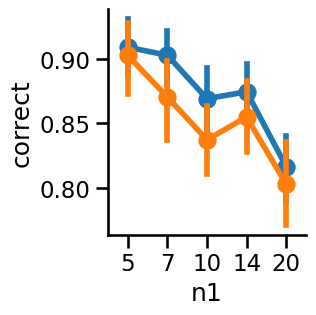

In [38]:
tmp = df.groupby(['subject', 'group','n1'])['correct'].mean()
sns.catplot(tmp.reset_index(), y='correct', x='n1',hue='group',kind='point',errorbar='ci',height=3.5,aspect=1,legend=False)

import pingouin as pg

temp = df.groupby(['subject', 'group','n1'])['correct'].mean().to_frame()

for n1 in temp.index.get_level_values('n1').unique():
    ttest = pg.ttest(temp.loc[(slice(None), 'control', n1), 'correct'], temp.loc[(slice(None), 'dyscalc', n1), 'correct'])
    p_val = np.round(ttest['p-val'].values[0],3)
    print(f'p-value for n1={n1}: {p_val}')


p-value for frac=0.4: 0.838
p-value for frac=0.7: 0.025
p-value for frac=0.9: 0.323
p-value for frac=1.1: 0.355
p-value for frac=1.3: 0.979
p-value for frac=2.1: 0.597


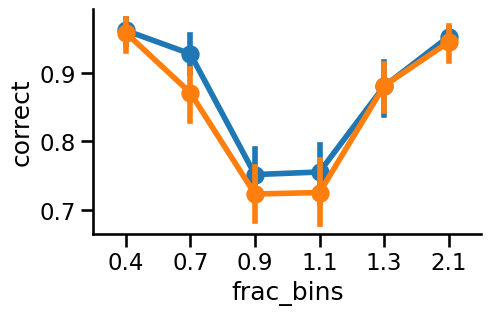

In [42]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

x_var = 'frac_bins'
def cluster_offers(d, n=6, key='log(risky/safe)'):
    return pd.qcut(d[key], n, duplicates='drop').apply(lambda x: np.round(x.mid,1))
df['frac_bins'] = cluster_offers(df, key='frac')
temp = df.groupby(['subject','group',x_var]).mean()

tmp = df.groupby(['subject', 'group',x_var])['correct'].mean()
sns.catplot(tmp.reset_index(), y='correct', x=x_var,hue='group',errorbar='ci',kind='point',height=3.5, aspect=1.5,legend=False)

temp = df.groupby(['subject', 'group',x_var])['correct'].mean().to_frame()

for n in temp.index.get_level_values(x_var).unique():
    ttest = pg.ttest(temp.loc[(slice(None), 'control', n), 'correct'], temp.loc[(slice(None), 'dyscalc', n), 'correct'])
    p_val = np.round(ttest['p-val'].values[0],3)
    print(f'p-value for frac={n}: {p_val}')

Text(0.5, 1.0, 'p=0.176')

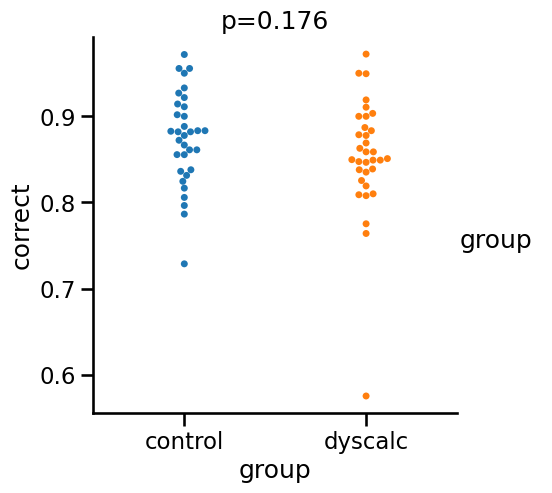

In [51]:
import pingouin as pg

temp = df.groupby(['subject', 'group',])['correct'].mean().reset_index()

ttest = pg.ttest(temp.loc[temp['group']=='control', 'correct'], temp.loc[temp['group']=='dyscalc', 'correct'])
p_val = np.round(ttest['p-val'].values[0],3)   
sns.catplot(temp.reset_index(), y='correct', x='group', hue='group', kind='swarm',errorbar=('ci', 95)) #x='n1',
plt.title(f'p={p_val}')

<Axes: xlabel='age', ylabel='correct'>

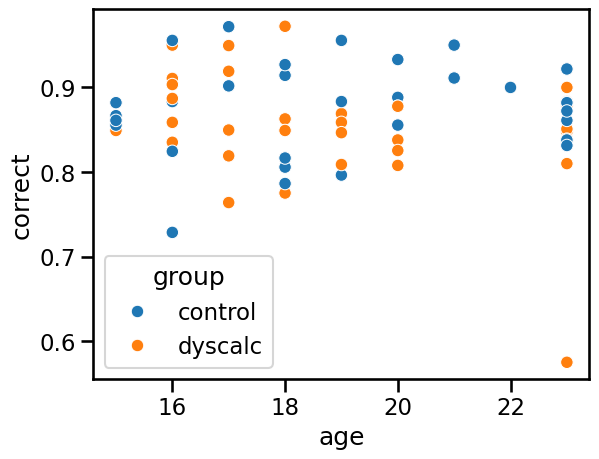

In [7]:
tmp = df.groupby(['subject', 'group','age'])['correct'].mean()
sns.scatterplot(tmp.reset_index(), y='correct', x='age',hue='group') # ,kind='scatter'